# Excercise: MNIST Digits

```
Integrante 1: <>
Integrante 2: <>
Integrante 3: <>
```

[MNIST digits](http://yann.lecun.com/exdb/mnist/) is a dataset of written digits composed of 70000 black and white images. This dataset is a classic amongst people learning to apply machine learning models, specifically to pattern/image recognition. Of the 70K images, 60K are labeled examples and 10K are a validation set. These images are preprocessed so that they may be easily experimented with using machine learning.

Lets load a downsized version of this dataset from the scikit-learn package.

In [16]:
from sklearn.datasets import load_digits
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

This imports a function that will be used to load the digits. This particular version has 1797 images and each one has been downscaled to 8x8, as opposed to the original size of 28x28.

In [17]:
digits, target = load_digits(return_X_y=True)

def describe_ndarray(ndarr):
  print(f'Type: {type(ndarr)}')
  print(f'Dimensions: {ndarr.ndim}')
  print(f'Size: {ndarr.size}')
  print(f'Shape: {ndarr.shape}')
  print(f'Type: {ndarr.dtype.name}')
  print(f'Item size: {ndarr.itemsize}')
  print()

describe_ndarray(digits)
describe_ndarray(target)

Type: <class 'numpy.ndarray'>
Dimensions: 2
Size: 115008
Shape: (1797, 64)
Type: float64
Item size: 8

Type: <class 'numpy.ndarray'>
Dimensions: 1
Size: 1797
Shape: (1797,)
Type: int32
Item size: 4



Here we can see that we have two ndarrays, the first contains 1797 arrays of 64 (flattened 8x8 image) and the second has 1797 numbers, which correspond to the label of the digit. Lets try to visualize this.

In [18]:
print(digits[:4,])
print(target[:4,])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

These are the first 3 digits, but it's difficult to see the image and verify if they match the labels, lets reshape the data and try again.

In [19]:
digits_square = digits.reshape(-1, 8, 8)

print(digits_square[:4,])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

Now that we have squared the digits, it's easier to see if they're numbers, but we can do something better with matplotlib.

<Figure size 432x288 with 0 Axes>

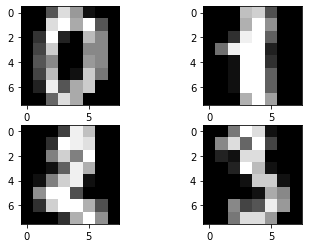

In [20]:
plt.gray()

plt.figure()

plt.subplot(2,2,1)
plt.imshow(digits_square[0])

plt.subplot(2,2,2)
plt.imshow(digits_square[1])

plt.subplot(2,2,3)
plt.imshow(digits_square[2])

plt.subplot(2,2,4)
plt.imshow(digits_square[3])

plt.show()


Now we can easily see that these are in fact numbers and they correspond to the digits in `target`.

Now, imagine a new person writes a new digit that is not in the dataset and we want to automatically predict what this digit is by looking just at the image. For this purpose, we must develop an algorithm that can tell us this.

Now, suppose we've written the algorithm, how do we test it without having the new images? Well, we can use the existing labels in order to know what the right answer is and then compare that to our algorithms answer. We will repeat the process for a random 30% of all digits and calculate the overall accuracy of our algorithm by: (correct answers)/(total).

In short, you need to create a function that takes N number of digits and outputs an ndarray of (N,) with the predictions for each digit, all of these will be compared against the real values.

In order to make this easier, we will only be comparing two classess of digits and classifing wether a digit is one of the two, you can choose which two digits to classify.

[[ 0.  0.  7. ... 12.  3.  0.]
 [ 0.  2. 10. ...  3.  0.  0.]
 [ 0.  0.  7. ... 16.  3.  0.]
 ...
 [ 0.  0.  6. ... 14. 13.  0.]
 [ 0.  0.  7. ...  9.  1.  0.]
 [ 0.  0.  2. ... 16. 13.  8.]]
[2 2 8 2 2 8 2 8 8 2 8 2 8 8 8 2 8 8 2 2 8 2 8 8 2 2 8 8 8 2 8 2 2 8 2 2 2
 2 2 8 8 8 8 2 8 2 2 2 2 2 8 8 8 8 8 2 8 8 8 8 8 8 2 8 2 8 8 2 8 2 2 8 2 2
 2 2 8 8 8 2 8 2 8 8 2 2 8 8 8 2 2 2 8 8 2 2 8 2 2 2 2 8 2]


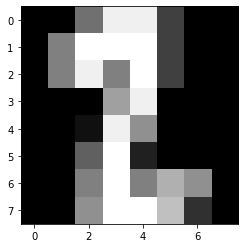

In [21]:
def generate_random_indices(percentage, class1, class2):
    indices_of_class1 = np.nonzero(target == class1)[0]
    indices_of_class2 = np.nonzero(target == class2)[0]

    min_length = min(len(indices_of_class1), len(indices_of_class2)) - 1

    indices_of_class = np.concatenate((indices_of_class1[:min_length], indices_of_class2[:min_length]))

    return random.sample(indices_of_class.tolist(),k=int(len(indices_of_class)*percentage))

def get_random_data(class1, class2):
    indices = generate_random_indices(0.3, class1, class2)
    return digits[indices,:], target[indices]

digits_sample, target_sample = get_random_data(2,8)


print(digits_sample)
print(target_sample)

plt.imshow(digits_sample.reshape((-1, 8, 8))[0])

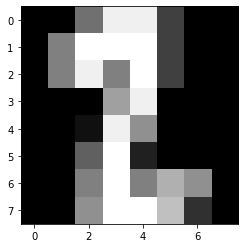

In [22]:
plt.imshow(digits_sample.reshape((-1, 8, 8))[0])

In [23]:
"""Por medio de un parametro entero (umbral) remplazamos el valor del pixel que sea menor 
al umbral, para tener una imagen mas fina"""
def umbral(k, date):
    for i in range(len(date)):
        for j in range(len(date[i])):
            if int(date[i][j]) <= k:
                date[i][j] = 0
    return date

In [24]:
"""Separa el conjunto de datos, apartir de un percentil"""
def separated_data(data_train,data_targe, percent):
    X_data_train = data_train[:int(np.rint(len(data_train)*percent))]
    y_data_train = data_targe[:int(np.rint(len(data_targe)*percent))]
    X_data_test = data_train[int(np.rint(len(data_train)*percent)):]
    y_data_test = data_targe[int(np.rint(len(data_targe)*percent)):]
    return [X_data_train,y_data_train,X_data_test,y_data_test]

In [25]:
"""Cuennta elementos de los octetos"""
def made_frequency_table(date):
    ni = []
    for i in range(8):
        c = 0
        for j in date[i]:
            if j!=0:
                c=c+1
        ni.append(c)
    return ni

In [26]:
"""Entrena el modelo"""
def train_data(X_data_train, Y_data_train):
    data_0 = []
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    data_6 = []
    data_7 = []
    data_8 = []
    data_9 = []
    
    for i, j in enumerate(Y_data_train):
        value = X_data_train.reshape((-1, 8, 8))[i]
        date = made_frequency_table(value)
        if j == 0:
            data_0.append(date)
        elif j == 1:
            data_1.append(date)
        elif j == 2:
            data_2.append(date)
        elif j == 3:
            data_3.append(date)
        elif j == 4:
            data_4.append(date)
        elif j == 5:
            data_5.append(date)
        elif j == 6:
            data_6.append(date)
        elif j == 7:
            data_7.append(date)
        elif j == 8:
            data_8.append(date)
        elif j == 9:
            data_9.append(date)
            
    data_0 = pd.DataFrame(np.array(data_0)).median()
    data_1 = pd.DataFrame(np.array(data_1)).median()
    data_2 = pd.DataFrame(np.array(data_2)).median()
    data_3 = pd.DataFrame(np.array(data_3)).median()
    data_4 = pd.DataFrame(np.array(data_4)).median()
    data_5 = pd.DataFrame(np.array(data_5)).median()
    data_6 = pd.DataFrame(np.array(data_6)).median()
    data_7 = pd.DataFrame(np.array(data_7)).median()
    data_8 = pd.DataFrame(np.array(data_8)).median()
    data_9 = pd.DataFrame(np.array(data_9)).median()
    
    datass = np.array([data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9])
    return datass


In [27]:
"""Calcula la distancia euclidiana"""
def dist_eucli(x,y):
    print(x,y)
    return np.rint(np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2+(x[2]-y[2])**2+(x[3]-y[3])**2+(x[4]-y[4])**2+(x[5]-y[5])**2+(x[6]-y[6])**2+(x[7]-y[7])**2))

In [28]:
a = [8,9,5,1,4,5,8]
np.where(a==np.min(a))[0][0]

3

In [29]:
"""Realiza la prediccion"""
def predict(X_data_test, y_data_test, datass):
    accert = []
    for i in range(len(X_data_test)):
        value = X_data_test.reshape((-1, 8, 8))[i]
        date = made_frequency_table(value)
        date = np.array(date)
        dist = []

        for j in  range(len(datass)):
            dist.append(dist_eucli(datass[j],date))
        mins = int(np.where(dist==np.min(dist))[0][0])
        
        accert.append(mins)
    return accert

In [30]:
print(digits[0], target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.] 0


# Metodo 1

## Data sin aplicarle el metodo del umbral

#### Divido el conjunto de datos en 70% de entreno y 30% de prueba

In [31]:
date_separada = separated_data(digits,target, 0.7)

X_data_train = date_separada[0]
y_data_train = date_separada[1]
X_data_test = date_separada[2]
y_data_test = date_separada[3]

print(len(digits), len(target), len(X_data_train), len(y_data_train), len(X_data_test), len(y_data_test))

1797 1797 1258 1258 539 539


#### Entreno el modelo

In [32]:
datass = train_data(X_data_train, y_data_train)
datass

array([[4., 5., 5., 4., 4., 4., 5., 4.],
       [3., 4., 4., 4., 4., 3., 4., 4.],
       [4., 5., 4., 3., 3., 3., 5., 6.],
       [4., 5., 4., 3., 4., 3., 5., 5.],
       [3., 3., 5., 6., 6., 5., 3., 2.],
       [5., 6., 3., 4., 4., 2., 4., 4.],
       [3., 3., 3., 3., 5., 6., 5., 5.],
       [5., 5., 4., 5., 5., 4., 2., 2.],
       [4., 5., 5., 4., 4., 4., 4., 4.],
       [4., 5., 5., 5., 4., 2., 4., 5.]])

In [33]:
sin_tratar = predict(X_data_test, y_data_test, datass)

[4. 5. 5. 4. 4. 4. 5. 4.] [2 4 6 5 5 4 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 4 6 5 5 4 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 4 6 5 5 4 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 4 6 5 5 4 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 4 6 5 5 4 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 4 6 5 5 4 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 4 6 5 5 4 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [2 4 6 5 5 4 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [2 4 6 5 5 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [2 4 6 5 5 4 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [6 5 3 2 3 3 4 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [6 5 3 2 3 3 4 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [6 5 3 2 3 3 4 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [6 5 3 2 3 3 4 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [6 5 3 2 3 3 4 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [6 5 3 2 3 3 4 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [6 5 3 2 3 3 4 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [6 5 3 2 3 3 4 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [6 5 3 2 3 3 4 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [6 5 3 2 3 3 4 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [6 6 4 3 3 3 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [6 6 4 3 3 3 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [6 6 4

[4. 5. 4. 3. 3. 3. 5. 6.] [6 6 2 3 3 3 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [6 6 2 3 3 3 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [6 6 2 3 3 3 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [6 6 2 3 3 3 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [6 6 2 3 3 3 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [6 6 2 3 3 3 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [6 6 2 3 3 3 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [6 6 2 3 3 3 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 3 5 6 6 2 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 3 5 6 6 2 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 3 5 6 6 2 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 3 5 6 6 2 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 4 3 5 6 6 2 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 4 3 5 6 6 2 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 3 5 6 6 2 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 4 3 5 6 6 2 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 4 3 5 6 6 2 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 4 3 5 6 6 2 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 6 4 3 3 3 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 6 4 3 3 3 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 6 4 3 3 3 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 6 4 3 3 3 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 6 4

[4. 5. 5. 5. 4. 2. 4. 5.] [3 2 3 4 4 6 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [6 5 2 5 5 3 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [6 5 2 5 5 3 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [6 5 2 5 5 3 5 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [6 5 2 5 5 3 5 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [6 5 2 5 5 3 5 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [6 5 2 5 5 3 5 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [6 5 2 5 5 3 5 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [6 5 2 5 5 3 5 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [6 5 2 5 5 3 5 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [6 5 2 5 5 3 5 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [2 3 3 3 5 5 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 3 3 3 5 5 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 3 3 3 5 5 6 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 3 3 3 5 5 6 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 3 3 3 5 5 6 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 3 3 3 5 5 6 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 3 3 3 5 5 6 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [2 3 3 3 5 5 6 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [2 3 3 3 5 5 6 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [2 3 3 3 5 5 6 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 6 4 4 4 2 2 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 6 4

[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 5 4 4 4 4 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 5 4 4 4 4 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 4 6 5 2 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 4 6 5 2 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 4 6 5 2 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 4 6 5 2 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 4 6 5 2 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 4 6 5 2 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 4 6 5 2 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 4 6 5 2 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 4 6 5 2 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 4 6 5 2 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 4 4 4 4 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 4 4 4 4 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 4 4 4 4 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 4 4 4 4 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 4 4 4 4 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 4 4 4 4 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 4 4 4 4 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 3

[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 4 4 3 2 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 4 4 3 2 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 4 4 3 2 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 4 4 3 2 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 4 4 3 2 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 4 4 3 2 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 4 4 3 2 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 4 4 3 2 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 4 4 3 2 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 6 2 6 6 2 3 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 6 2 6 6 2 3 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 6 2 6 6 2 3 2]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 6 2 6 6 2 3 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 6 2 6 6 2 3 2]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 6 2 6 6 2 3 2]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 6 2 6 6 2 3 2]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 6 2 6 6 2 3 2]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 6 2 6 6 2 3 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 6 2 6 6 2 3 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 6 6 4 4 3 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 6 6 4 4 3 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 6 6 4 4 3 5 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 6 6

[4. 5. 4. 3. 3. 3. 5. 6.] [3 5 4 3 2 2 6 6]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 5 4 3 2 2 6 6]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 5 4 3 2 2 6 6]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 5 4 3 2 2 6 6]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 5 4 3 2 2 6 6]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 5 4 3 2 2 6 6]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 5 4 3 2 2 6 6]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 5 4 3 2 2 6 6]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 3 3 3 3 4 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 3 3 3 3 4 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 3 3 3 3 4 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 3 3 3 3 4 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 3 3 3 3 4 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 3 3 3 3 4 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 3 3 3 3 4 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 3 3 3 3 4 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 3 3 3 3 4 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 3 3 3 3 4 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 1 5 5 3 2 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 1 5 5 3 2 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 1 5 5 3 2 2]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 1 5 5 3 2 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 1

[4. 5. 5. 4. 4. 4. 5. 4.] [5 6 6 6 3 2 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 6 6 6 3 2 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 6 6 6 3 2 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 6 6 6 3 2 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 6 6 6 3 2 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 6 6 6 3 2 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 6 6 6 3 2 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 6 6 6 3 2 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 6 6 6 3 2 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 6 6 6 3 2 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 3 3 6 6 6 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 3 3 6 6 6 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 3 3 6 6 6 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 3 3 6 6 6 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 3 3 6 6 6 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 3 3 6 6 6 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 3 3 6 6 6 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 3 3 6 6 6 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 3 3 6 6 6 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 3 3 6 6 6 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 3 3 3 3 3 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 3 3 3 3 3 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 3 3

[3. 4. 4. 4. 4. 3. 4. 4.] [3 3 4 5 5 5 5 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 3 4 5 5 5 5 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 3 4 5 5 5 5 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 3 4 5 5 5 5 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 3 4 5 5 5 5 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 3 4 5 5 5 5 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 3 4 5 5 5 5 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 3 4 5 5 5 5 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 3 4 5 5 5 5 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 6 6 2 4 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 6 6 2 4 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 6 6 2 4 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 6 6 2 4 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 6 6 2 4 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 6 6 2 4 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 6 6 2 4 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 6 6 2 4 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 6 6 2 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 6 6 2 4 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 5 4 5 6 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 5 4 5 6 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 5 4 5 6 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 5

[3. 4. 4. 4. 4. 3. 4. 4.] [4 6 5 5 2 2 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 6 5 5 2 2 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 6 5 5 2 2 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 6 5 5 2 2 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 6 5 5 2 2 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 6 5 5 2 2 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 6 5 5 2 2 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 6 5 5 2 2 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 6 5 5 2 2 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 6 4 4 5 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 6 4 4 5 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 6 4 4 5 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 6 4 4 5 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 6 4 4 5 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 6 4 4 5 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 6 4 4 5 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 6 4 4 5 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 6 4 4 5 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 6 4 4 5 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 5 5 4 2 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 5 5 4 2 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 5 5 4 2 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 5

[4. 5. 4. 3. 4. 3. 5. 5.] [3 3 4 6 6 5 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 3 4 6 6 5 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 3 4 6 6 5 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 3 4 6 6 5 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 3 4 6 6 5 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 3 4 6 6 5 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 3 4 6 6 5 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 6 6 5 3 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 6 6 5 3 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 6 6 5 3 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 6 6 5 3 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 4 6 6 5 3 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 4 6 6 5 3 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 6 6 5 3 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 4 6 6 5 3 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 4 6 6 5 3 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 4 6 6 5 3 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 6 5 5 4 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 6 5 5 4 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 6 5 5 4 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 6 5 5 4 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 6 5 5 4 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 6

[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 5 3 5 5 2 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 5 3 5 5 2 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 5 3 5 5 2 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 5 3 5 5 2 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 3 3 3 4 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 3 3 3 4 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 3 3 3 4 6 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 3 3 3 4 6 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 3 3 3 4 6 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 3 3 3 4 6 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 3 3 3 4 6 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 3 3 3 4 6 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 3 3 3 4 6 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 3 3 3 4 6 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 3 3 4 3 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 3 3 4 3 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 3 3 4 3 6 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 3 3 4 3 6 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 3 3 4 3 6 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 3 3 4 3 6 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 3 3 4 3 6 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 3 3 4 3 6 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 3

[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 6 3 2 2 3 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 6 3 2 2 3 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 6 3 2 2 3 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 6 3 2 2 3 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 6 3 2 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 6 3 2 2 3 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 5 2 5 5 2 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 5 2 5 5 2 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 5 2 5 5 2 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 5 2 5 5 2 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 5 2 5 5 2 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 5 2 5 5 2 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 5 2 5 5 2 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 5 2 5 5 2 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 5 2 5 5 2 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 5 2 5 5 2 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [2 2 4 6 6 6 5 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 2 4 6 6 6 5 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 2 4 6 6 6 5 2]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 2 4 6 6 6 5 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 2 4 6 6 6 5 2]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 2 4 6 6 6 5 2]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 2 4

[3. 3. 5. 6. 6. 5. 3. 2.] [4 6 6 5 2 2 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 6 6 5 2 2 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 6 6 5 2 2 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 6 6 5 2 2 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 6 6 5 2 2 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 6 6 5 2 2 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 4 4 4 4 2 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 4 4 4 4 2 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 4 4 4 4 2 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 4 4 4 4 2 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 4 4 4 4 2 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 4 4 4 4 2 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 4 4 4 4 2 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 4 4 4 4 2 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 4 4 4 4 2 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 4 4 4 4 2 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 3 5 2 2 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 3 5 2 2 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 3 5 2 2 5 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 3 5 2 2 5 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 3 5 2 2 5 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 3 5 2 2 5 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 3

[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 5 6 4 3 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 6 5 5 2 2 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 6 5 5 2 2 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 6 5 5 2 2 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 6 5 5 2 2 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 6 5 5 2 2 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 6 5 5 2 2 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 6 5 5 2 2 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 6 5 5 2 2 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 6 5 5 2 2 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 6 5 5 2 2 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 5 5 4 3 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 5 5 4 3 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 5 5 4 3 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 5 5 4 3 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 5 5 4 3 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 5 5 4 3 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 5 5 4 3 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 5 5 4 3 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 5 5 4 3 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 5 5 4 3 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 6 5 5 6 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 6

[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 5 5 2 3 3 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 5 5 2 3 3 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 6 5 5 5 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 6 5 5 5 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 6 5 5 5 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 6 5 5 5 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 6 5 5 5 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 6 5 5 5 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 6 5 5 5 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 6 5 5 5 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 6 5 5 5 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 6 5 5 5 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 5 4 4 4 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 5 4 4 4 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 5 4 4 4 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 5 4 4 4 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 5 4 4 4 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 5 4 4 4 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 5 4 4 4 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 5 4 4 4 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 5 4 4 4 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 5 4 4 4 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 5

[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 2 4 6 4 2 2]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 2 4 6 4 2 2]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 2 4 6 4 2 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 2 4 6 4 2 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 5 5 6 3 3 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 5 5 6 3 3 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 5 5 6 3 3 2]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 5 5 6 3 3 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 5 5 6 3 3 2]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 5 5 6 3 3 2]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 5 5 6 3 3 2]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 5 5 6 3 3 2]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 5 5 6 3 3 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 5 5 6 3 3 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 6 4 4 3 3 3 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 6 4 4 3 3 3 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 6 4 4 3 3 3 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 6 4 4 3 3 3 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 6 4 4 3 3 3 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 6 4 4 3 3 3 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 6 4 4 3 3 3 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 6 4 4 3 3 3 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 6 4

[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 3 4 3 3 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 3 4 3 3 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 3 4 3 3 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 3 4 3 3 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 3 4 3 3 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 3 4 3 3 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 2 5 6 6 4 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 2 5 6 6 4 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 2 5 6 6 4 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 2 5 6 6 4 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 2 5 6 6 4 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 2 5 6 6 4 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 2 5 6 6 4 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 2 5 6 6 4 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 2 5 6 6 4 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 2 5 6 6 4 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [2 3 2 4 5 5 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 3 2 4 5 5 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 3 2 4 5 5 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 3 2 4 5 5 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 3 2 4 5 5 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 3 2 4 5 5 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 3 2

[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 4 6 6 6 2 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [2 4 4 4 3 2 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 4 4 4 3 2 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 4 4 4 3 2 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 4 4 4 3 2 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 4 4 4 3 2 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 4 4 4 3 2 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 4 4 4 3 2 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [2 4 4 4 3 2 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [2 4 4 4 3 2 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [2 4 4 4 3 2 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [2 3 2 4 5 5 5 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [2 3 2 4 5 5 5 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [2 3 2 4 5 5 5 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [2 3 2 4 5 5 5 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [2 3 2 4 5 5 5 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [2 3 2 4 5 5 5 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [2 3 2 4 5 5 5 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [2 3 2 4 5 5 5 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [2 3 2 4 5 5 5 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [2 3 2 4 5 5 5 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 4 3 2 2 4 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 4

[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 6 6 5 4 3 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 6 6 5 4 3 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 6 6 5 4 3 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 6 6 5 4 3 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 4 6 6 5 4 3 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 4 6 6 5 4 3 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 6 6 5 4 3 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 4 6 6 5 4 3 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 4 6 6 5 4 3 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 4 6 6 5 4 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 4 5 6 4 3 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 4 5 6 4 3 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 4 5 6 4 3 2]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 4 5 6 4 3 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 4 5 6 4 3 2]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 4 5 6 4 3 2]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 4 5 6 4 3 2]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 4 5 6 4 3 2]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 4 5 6 4 3 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 4 5 6 4 3 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 3 4 2 2 6 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 3 4 2 2 6 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 3 4

[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 3 5 6 2 3 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [6 6 4 3 4 5 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [6 6 4 3 4 5 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [6 6 4 3 4 5 5 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [6 6 4 3 4 5 5 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [6 6 4 3 4 5 5 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [6 6 4 3 4 5 5 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [6 6 4 3 4 5 5 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [6 6 4 3 4 5 5 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [6 6 4 3 4 5 5 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [6 6 4 3 4 5 5 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 6 6 4 2 5 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 6 6 4 2 5 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 6 6 4 2 5 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 6 6 4 2 5 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 6 6 4 2 5 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 6 6 4 2 5 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 6 6 4 2 5 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 6 6 4 2 5 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 6 6 4 2 5 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 6 6 4 2 5 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 5 4 4 3 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 5

[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 3 5 6 4 4 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 3 5 6 4 4 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 3 5 6 4 4 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 3 5 6 4 4 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 3 5 6 4 4 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 3 5 6 4 4 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 3 5 6 4 4 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 3 5 6 4 4 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 3 5 6 4 4 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [5 5 5 5 4 2 3 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [5 5 5 5 4 2 3 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [5 5 5 5 4 2 3 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [5 5 5 5 4 2 3 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [5 5 5 5 4 2 3 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [5 5 5 5 4 2 3 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [5 5 5 5 4 2 3 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [5 5 5 5 4 2 3 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [5 5 5 5 4 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [5 5 5 5 4 2 3 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 2 3 3 5 6 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 2 3 3 5 6 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 2 3 3 5 6 6 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 2 3

[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 6 4 4 6 5 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 4 6 4 4 6 5 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 4 6 4 4 6 5 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 4 6 4 4 6 5 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 4 4 4 4 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 4 4 4 4 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 4 4 4 4 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 4 4 4 4 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 4 4 4 4 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 4 4 4 4 4 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 4 4 4 4 4 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 4 4 4 4 4 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 4 2 2 5 7 6]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 4 2 2 5 7 6]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 4 2 2 5 7 6]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 4 2 2 5 7 6]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 4 4 2 2 5 7 6]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 4 4 2 2 5 7 6]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 4 2 2 5 7 6]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 4 4 2 2 5 7 6]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 4 4

[4. 5. 5. 4. 4. 4. 5. 4.] [3 5 5 4 4 6 6 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 5 5 4 4 6 6 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 5 5 4 4 6 6 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 5 5 4 4 6 6 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 5 5 4 4 6 6 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 5 5 4 4 6 6 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 5 5 4 4 6 6 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 5 5 4 4 6 6 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 5 5 4 4 6 6 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 5 5 4 4 6 6 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 4 5 5 5 4 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 4 5 5 5 4 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 4 5 5 5 4 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 4 4 5 5 5 4 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 4 4 5 5 5 4 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 4 4 5 5 5 4 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 4 4 5 5 5 4 5]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 4 4 5 5 5 4 5]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 4 4 5 5 5 4 5]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 4 4 5 5 5 4 5]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 4 4 6 6 5 2 2]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 4 4 6 6 5 2 2]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 4 4

[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 6 5 5 5 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 6 5 5 5 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 6 5 5 5 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 6 5 5 5 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 6 5 5 5 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 6 5 5 5 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 2 3 5 6 6 2 3]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 2 3 5 6 6 2 3]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 2 3 5 6 6 2 3]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 2 3 5 6 6 2 3]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 2 3 5 6 6 2 3]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 2 3 5 6 6 2 3]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 2 3 5 6 6 2 3]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 2 3 5 6 6 2 3]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 2 3 5 6 6 2 3]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 2 3 5 6 6 2 3]
[4. 5. 5. 4. 4. 4. 5. 4.] [3 4 4 4 5 5 6 5]
[3. 4. 4. 4. 4. 3. 4. 4.] [3 4 4 4 5 5 6 5]
[4. 5. 4. 3. 3. 3. 5. 6.] [3 4 4 4 5 5 6 5]
[4. 5. 4. 3. 4. 3. 5. 5.] [3 4 4 4 5 5 6 5]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 4 4 4 5 5 6 5]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 4 4 4 5 5 6 5]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 4 4

[4. 5. 4. 3. 4. 3. 5. 5.] [3 3 5 6 6 6 5 2]
[3. 3. 5. 6. 6. 5. 3. 2.] [3 3 5 6 6 6 5 2]
[5. 6. 3. 4. 4. 2. 4. 4.] [3 3 5 6 6 6 5 2]
[3. 3. 3. 3. 5. 6. 5. 5.] [3 3 5 6 6 6 5 2]
[5. 5. 4. 5. 5. 4. 2. 2.] [3 3 5 6 6 6 5 2]
[4. 5. 5. 4. 4. 4. 4. 4.] [3 3 5 6 6 6 5 2]
[4. 5. 5. 5. 4. 2. 4. 5.] [3 3 5 6 6 6 5 2]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 4 4 4 4 5 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 4 4 4 4 5 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 4 4 4 4 5 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 4 4 4 4 5 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 4 4 4 4 5 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 4 4 4 4 5 4]
[3. 3. 3. 3. 5. 6. 5. 5.] [4 5 4 4 4 4 5 4]
[5. 5. 4. 5. 5. 4. 2. 2.] [4 5 4 4 4 4 5 4]
[4. 5. 5. 4. 4. 4. 4. 4.] [4 5 4 4 4 4 5 4]
[4. 5. 5. 5. 4. 2. 4. 5.] [4 5 4 4 4 4 5 4]
[4. 5. 5. 4. 4. 4. 5. 4.] [4 5 5 3 4 4 4 4]
[3. 4. 4. 4. 4. 3. 4. 4.] [4 5 5 3 4 4 4 4]
[4. 5. 4. 3. 3. 3. 5. 6.] [4 5 5 3 4 4 4 4]
[4. 5. 4. 3. 4. 3. 5. 5.] [4 5 5 3 4 4 4 4]
[3. 3. 5. 6. 6. 5. 3. 2.] [4 5 5 3 4 4 4 4]
[5. 6. 3. 4. 4. 2. 4. 4.] [4 5 5

In [34]:
def accuracy(predictions):
    return np.count_nonzero(y_data_test == predictions)/len(X_data_test)

In [35]:
accuracy(sin_tratar)

0.5714285714285714

## Data donde le aplica el metodo del umbral

In [36]:
digits_C = digits.copy()
target_C = target.copy()
digits_C = umbral(1,digits_C)

In [37]:
date_separada = separated_data(digits_C,target_C, 0.7)

X_data_train = date_separada[0]
y_data_train = date_separada[1]
X_data_test = date_separada[2]
y_data_test = date_separada[3]

print(len(digits), len(target), len(X_data_train), len(y_data_train), len(X_data_test), len(y_data_test))

1797 1797 1258 1258 539 539


In [38]:
datass = train_data(X_data_train, y_data_train)
datass

array([[4., 4., 5., 4., 4., 4., 5., 4.],
       [3., 3., 4., 4., 4., 3., 3., 3.],
       [3., 5., 4., 3., 2., 3., 5., 5.],
       [4., 5., 3., 3., 3., 3., 5., 4.],
       [2., 3., 4., 5., 6., 5., 2., 2.],
       [5., 5., 3., 4., 4., 2., 4., 3.],
       [2., 3., 2., 3., 5., 5., 5., 4.],
       [5., 5., 3., 4., 5., 3., 2., 2.],
       [4., 5., 4., 4., 3., 4., 4., 4.],
       [4., 5., 5., 5., 4., 2., 4., 4.]])

In [39]:
tratar = predict(X_data_test, y_data_test, datass)

[4. 4. 5. 4. 4. 4. 5. 4.] [2 4 6 5 5 3 4 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 4 6 5 5 3 4 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 4 6 5 5 3 4 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 4 6 5 5 3 4 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 4 6 5 5 3 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 4 6 5 5 3 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 4 6 5 5 3 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 4 6 5 5 3 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 4 6 5 5 3 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 4 6 5 5 3 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [6 4 3 2 2 3 4 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [6 4 3 2 2 3 4 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [6 4 3 2 2 3 4 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [6 4 3 2 2 3 4 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [6 4 3 2 2 3 4 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [6 4 3 2 2 3 4 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [6 4 3 2 2 3 4 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [6 4 3 2 2 3 4 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [6 4 3 2 2 3 4 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [6 4 3 2 2 3 4 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [6 6 3 3 3 2 5 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [6 6 3 3 3 2 5 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [6 6 3

[3. 3. 4. 4. 4. 3. 3. 3.] [5 5 4 3 3 4 4 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 5 4 3 3 4 4 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 5 4 3 3 4 4 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 5 4 3 3 4 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 5 4 3 3 4 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 5 4 3 3 4 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 5 4 3 3 4 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 4 3 3 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 4 3 3 4 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 3 4 5 6 5 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 3 4 5 6 5 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 3 4 5 6 5 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 3 4 5 6 5 2 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 3 4 5 6 5 2 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 3 4 5 6 5 2 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 4 5 6 5 2 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 4 5 6 5 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 4 5 6 5 2 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 4 5 6 5 2 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 5 5 2 2 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 5 5 2 2 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 5 5 2 2 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 5

[4. 4. 5. 4. 4. 4. 5. 4.] [4 6 5 5 3 3 4 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 6 5 5 3 3 4 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 6 5 5 3 3 4 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 6 5 5 3 3 4 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 6 5 5 3 3 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 6 5 5 3 3 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 6 5 5 3 3 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 6 5 5 3 3 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 6 5 5 3 3 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 6 5 5 3 3 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 5 4 6 2 2 3 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 5 4 6 2 2 3 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 5 4 6 2 2 3 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 5 4 6 2 2 3 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 5 4 6 2 2 3 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 5 4 6 2 2 3 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 5 4 6 2 2 3 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 5 4 6 2 2 3 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 5 4 6 2 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 5 4 6 2 2 3 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 4 5 4 4 4 5 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 4 5 4 4 4 5 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 4 5

[3. 5. 4. 3. 2. 3. 5. 5.] [3 3 2 4 4 6 4 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 3 2 4 4 6 4 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 3 2 4 4 6 4 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 3 2 4 4 6 4 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 2 4 4 6 4 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 2 4 4 6 4 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 2 4 4 6 4 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 2 4 4 6 4 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 2 2 3 3 3 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 2 2 3 3 3 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 2 2 3 3 3 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 2 2 3 3 3 2 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 2 2 3 3 3 2 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 2 2 3 3 3 2 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 2 2 3 3 3 2 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 2 2 3 3 3 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 2 2 3 3 3 2 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 2 2 3 3 3 2 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 6 4 2 4 3 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 6 4 2 4 3 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 6 4 2 4 3 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 6 4 2 4 3 2 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 6 4

[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 2 6 6 2 3 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 2 6 6 2 3 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 2 6 6 2 3 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 2 6 6 2 3 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 6 4 3 3 3 5 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 6 4 3 3 3 5 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 6 4 3 3 3 5 5]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 6 4 3 3 3 5 5]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 6 4 3 3 3 5 5]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 6 4 3 3 3 5 5]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 6 4 3 3 3 5 5]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 6 4 3 3 3 5 5]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 6 4 3 3 3 5 5]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 6 4 3 3 3 5 5]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 6 3 3 3 2 6 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 6 3 3 3 2 6 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 6 3 3 3 2 6 5]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 6 3 3 3 2 6 5]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 6 3 3 3 2 6 5]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 6 3 3 3 2 6 5]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 6 3 3 3 2 6 5]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 6 3 3 3 2 6 5]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 6 3

[5. 5. 3. 4. 5. 3. 2. 2.] [2 3 2 4 5 5 6 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 3 2 4 5 5 6 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 3 2 4 5 5 6 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 3 2 3 2 3 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 3 2 3 2 3 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 3 2 3 2 3 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 3 2 3 2 3 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 3 2 3 2 3 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 3 2 3 2 3 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 3 2 3 2 3 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 3 2 3 2 3 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 3 2 3 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 3 2 3 2 3 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 3 3 3 2 2 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 3 3 3 2 2 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 3 3 3 2 2 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 3 3 3 2 2 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 3 3 3 2 2 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 3 3 3 2 2 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 3 3 2 2 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 3 3 2 2 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 3 3 2 2 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 3

[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 3 3 3 3 3 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 3 3 3 3 3 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 3 3 3 3 3 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 3 3 3 3 3 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 4 4 6 4 3 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 4 4 6 4 3 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 4 4 6 4 3 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 4 4 6 4 3 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 4 4 6 4 3 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 4 4 6 4 3 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 4 4 6 4 3 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 4 4 6 4 3 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 4 4 6 4 3 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 4 4 6 4 3 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 2 3 3 2 4 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 2 3 3 2 4 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 2 3 3 2 4 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 2 3 3 2 4 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 2 3 3 2 4 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 2 3 3 2 4 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 2 3 3 2 4 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 2 3 3 2 4 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 2

[3. 5. 4. 3. 2. 3. 5. 5.] [4 6 4 4 3 2 4 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 6 4 4 3 2 4 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 6 4 4 3 2 4 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 6 4 4 3 2 4 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 6 4 4 3 2 4 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 6 4 4 3 2 4 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 6 4 4 3 2 4 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 6 4 4 3 2 4 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 4 4 4 4 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 4 4 4 4 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 4 4 4 4 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 4 4 4 4 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 4 4 4 4 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 4 4 4 4 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 4 4 4 4 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 4 4 4 4 5 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 4 4 4 4 5 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 4 4 4 4 5 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 5 4 2 2 3 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 5 4 2 2 3 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 5 4 2 2 3 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 5 4 2 2 3 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 5

[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 6 4 3 4 5 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 4 5 5 3 2 3 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 4 5 5 3 2 3 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 4 5 5 3 2 3 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 4 5 5 3 2 3 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 4 5 5 3 2 3 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 4 5 5 3 2 3 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 4 5 5 3 2 3 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 4 5 5 3 2 3 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 4 5 5 3 2 3 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 4 5 5 3 2 3 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 4 2 2 4 5 6]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 4 2 2 4 5 6]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 4 2 2 4 5 6]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 4 2 2 4 5 6]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 4 2 2 4 5 6]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 4 2 2 4 5 6]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 4 2 2 4 5 6]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 4 2 2 4 5 6]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 4 2 2 4 5 6]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 4 2 2 4 5 6]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 5 3 3 4 2 6 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 5 3

[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 6 6 4 3 3 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 4 6 6 4 3 3 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 4 6 6 4 3 3 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 4 6 6 4 3 3 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 5 5 5 5 3 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 5 5 5 5 3 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 5 5 5 5 3 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 5 5 5 5 3 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 5 5 5 5 3 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 5 5 5 5 3 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 5 5 5 5 3 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 5 5 5 5 3 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 5 5 5 3 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 5 5 5 3 2 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 4 4 5 4 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 4 4 5 4 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 4 4 5 4 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 4 4 5 4 2 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 4 4 5 4 2 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 4 4 4 5 4 2 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 4 4 5 4 2 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 4 4 4 5 4 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 4 4

[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 5 2 5 5 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 5 2 5 5 2 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 3 3 3 3 6 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 3 3 3 3 6 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 3 3 3 3 6 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 3 3 3 3 6 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 3 3 3 3 6 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 3 3 3 3 6 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 3 3 3 3 6 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 3 3 3 3 6 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 3 3 3 3 6 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 3 3 3 3 6 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 2 3 4 3 6 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 2 3 4 3 6 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 2 3 4 3 6 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 2 3 4 3 6 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 2 3 4 3 6 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 2 3 4 3 6 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 2 3 4 3 6 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 2 3 4 3 6 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 2 3 4 3 6 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 2 3 4 3 6 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 3 3

[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 6 3 2 2 2 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 6 3 2 2 2 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 6 3 2 2 2 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 6 3 2 2 2 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 6 3 2 2 2 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 6 3 2 2 2 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 6 3 2 2 2 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 6 3 2 2 2 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 5 2 5 5 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 5 2 5 5 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 5 2 5 5 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 5 2 5 5 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 5 2 5 5 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 5 2 5 5 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 5 2 5 5 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 5 2 5 5 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 5 2 5 5 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 5 2 5 5 2 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 2 4 6 6 6 4 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 2 4 6 6 6 4 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 2 4 6 6 6 4 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 2 4 6 6 6 4 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 2 4

[4. 5. 4. 4. 3. 4. 4. 4.] [3 5 6 4 2 2 3 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 5 6 4 2 2 3 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 5 4 4 4 4 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 5 4 4 4 4 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 5 4 4 4 4 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 5 4 4 4 4 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 5 4 4 4 4 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 5 4 4 4 4 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 5 4 4 4 4 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 5 4 4 4 4 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 4 4 4 4 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 4 4 4 4 2 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 3 5 2 2 4 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 3 5 2 2 4 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 3 5 2 2 4 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 3 5 2 2 4 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 3 5 2 2 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 3 5 2 2 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 3 5 2 2 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 3 5 2 2 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 3 5 2 2 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 3 5 2 2 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 3 4

[4. 5. 4. 4. 3. 4. 4. 4.] [2 3 4 6 6 4 3 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 3 4 6 6 4 3 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 3 3 4 2 3 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 3 3 4 2 3 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 3 3 4 2 3 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 3 3 4 2 3 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 3 3 4 2 3 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 3 3 4 2 3 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 3 3 4 2 3 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 3 3 4 2 3 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 3 3 4 2 3 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 3 3 4 2 3 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [1 3 3 4 5 4 5 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [1 3 3 4 5 4 5 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [1 3 3 4 5 4 5 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [1 3 3 4 5 4 5 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [1 3 3 4 5 4 5 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [1 3 3 4 5 4 5 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [1 3 3 4 5 4 5 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [1 3 3 4 5 4 5 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [1 3 3 4 5 4 5 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [1 3 3 4 5 4 5 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 5

[5. 5. 3. 4. 5. 3. 2. 2.] [5 6 5 5 2 2 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 6 5 5 2 2 2 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 6 5 5 2 2 2 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 4 3 3 4 4 4 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 4 3 3 4 4 4 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 4 3 3 4 4 4 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 4 3 3 4 4 4 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 4 3 3 4 4 4 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 4 3 3 4 4 4 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 4 3 3 4 4 4 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 4 3 3 4 4 4 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 4 3 3 4 4 4 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 4 3 3 4 4 4 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 6 6 5 2 2 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 6 6 5 2 2 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 6 6 5 2 2 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 6 6 5 2 2 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 6 6 5 2 2 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 6 6 5 2 2 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 6 6 5 2 2 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 6 6 5 2 2 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 6 6 5 2 2 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 6 6

[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 3 2 2 4 6 6]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 3 2 2 4 6 6]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 3 2 2 4 6 6]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 3 2 2 4 6 6]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 3 2 2 4 6 6]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 3 2 2 4 6 6]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 3 2 2 4 6 6]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 3 2 2 4 6 6]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 3 2 2 4 6 6]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 4 2 2 2 5 7]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 4 2 2 2 5 7]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 4 2 2 2 5 7]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 4 2 2 2 5 7]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 4 2 2 2 5 7]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 4 2 2 2 5 7]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 4 2 2 2 5 7]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 4 2 2 2 5 7]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 4 2 2 2 5 7]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 4 2 2 2 5 7]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 3 3 5 4 2 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 3 3 5 4 2 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 3 3 5 4 2 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 3 3

[4. 5. 5. 5. 4. 2. 4. 4.] [3 4 3 2 2 4 6 6]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 5 3 3 4 4 4 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 5 3 3 4 4 4 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 5 3 3 4 4 4 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 5 3 3 4 4 4 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 5 3 3 4 4 4 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 5 3 3 4 4 4 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 5 3 3 4 4 4 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 5 3 3 4 4 4 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 5 3 3 4 4 4 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 5 3 3 4 4 4 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 5 4 4 5 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 5 4 4 5 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 5 4 4 5 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 5 4 4 5 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 5 4 4 5 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 5 4 4 5 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 5 4 4 5 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 5 4 4 5 5 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 5 4 4 5 5 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 5 4 4 5 5 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 3 3 3 3 3 3 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 3 3

[3. 5. 4. 3. 2. 3. 5. 5.] [2 3 4 6 6 4 3 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 3 4 6 6 4 3 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 3 4 6 6 4 3 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 3 4 6 6 4 3 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 3 4 6 6 4 3 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 3 4 6 6 4 3 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 3 4 6 6 4 3 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 3 4 6 6 4 3 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 4 5 4 5 4 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 4 5 4 5 4 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 4 5 4 5 4 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 4 5 4 5 4 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 4 5 4 5 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 4 4 5 4 5 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 4 5 4 5 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 4 4 5 4 5 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 4 4 5 4 5 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 4 4 5 4 5 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 3 4 3 2 3 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 3 4 3 2 3 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 3 4 3 2 3 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 3 4 3 2 3 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 3

[2. 3. 4. 5. 6. 5. 2. 2.] [2 6 4 5 3 2 2 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 6 4 5 3 2 2 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 6 4 5 3 2 2 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 6 4 5 3 2 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 6 4 5 3 2 2 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 6 4 5 3 2 2 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 3 4 6 5 5 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 3 4 6 5 5 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 3 4 6 5 5 2 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [2 3 4 6 5 5 2 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [2 3 4 6 5 5 2 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 3 4 6 5 5 2 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 3 4 6 5 5 2 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 3 4 6 5 5 2 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 3 4 6 5 5 2 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 3 4 6 5 5 2 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 5 3 3 2 3 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 5 3 3 2 3 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 5 3 3 2 3 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 5 3 3 2 3 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 5 3 3 2 3 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 5 3 3 2 3 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 5

[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 3 5 6 4 3 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 3 5 6 4 3 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 3 3 4 6 5 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 3 3 4 6 5 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 3 3 4 6 5 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 3 3 4 6 5 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 3 3 4 6 5 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 3 3 4 6 5 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 3 4 6 5 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 3 4 6 5 5 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 3 4 6 5 5 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 3 4 6 5 5 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 5 2 4 6 6 2 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 5 2 4 6 6 2 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 5 2 4 6 6 2 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 5 2 4 6 6 2 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 5 2 4 6 6 2 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 5 2 4 6 6 2 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 5 2 4 6 6 2 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 5 2 4 6 6 2 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 2 4 6 6 2 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 2 4 6 6 2 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 3 4

[4. 4. 5. 4. 4. 4. 5. 4.] [4 5 6 5 2 2 3 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 5 6 5 2 2 3 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 5 6 5 2 2 3 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 5 6 5 2 2 3 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 5 6 5 2 2 3 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 5 6 5 2 2 3 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 5 6 5 2 2 3 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 5 6 5 2 2 3 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 5 6 5 2 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 5 6 5 2 2 3 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 6 4 3 3 5 3]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 6 4 3 3 5 3]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 6 4 3 3 5 3]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 6 4 3 3 5 3]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 6 4 3 3 5 3]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 4 6 4 3 3 5 3]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 6 4 3 3 5 3]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 4 6 4 3 3 5 3]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 4 6 4 3 3 5 3]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 4 6 4 3 3 5 3]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 4 4 6 5 2 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 4 4 6 5 2 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 4

[4. 4. 5. 4. 4. 4. 5. 4.] [3 3 2 2 4 5 6 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 3 2 2 4 5 6 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 3 2 2 4 5 6 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 3 2 2 4 5 6 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 3 2 2 4 5 6 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 3 2 2 4 5 6 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 3 2 2 4 5 6 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 3 2 2 4 5 6 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 3 2 2 4 5 6 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 3 2 2 4 5 6 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 2 2 3 5 5 5 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 2 2 3 5 5 5 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 2 2 3 5 5 5 5]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 2 2 3 5 5 5 5]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 2 2 3 5 5 5 5]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 2 2 3 5 5 5 5]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 2 2 3 5 5 5 5]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 2 2 3 5 5 5 5]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 2 2 3 5 5 5 5]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 2 2 3 5 5 5 5]
[4. 4. 5. 4. 4. 4. 5. 4.] [2 2 3 3 5 6 5 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [2 2 3 3 5 6 5 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [2 2 3

[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 4 2 3 3 3 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 4 2 3 3 3 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 5 3 2 3 4 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 5 3 2 3 4 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 5 3 2 3 4 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 5 3 2 3 4 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 5 3 2 3 4 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 5 3 2 3 4 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 5 3 2 3 4 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 5 3 2 3 4 5 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 5 3 2 3 4 5 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 5 3 2 3 4 5 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [4 4 4 4 4 3 4 2]
[3. 3. 4. 4. 4. 3. 3. 3.] [4 4 4 4 4 3 4 2]
[3. 5. 4. 3. 2. 3. 5. 5.] [4 4 4 4 4 3 4 2]
[4. 5. 3. 3. 3. 3. 5. 4.] [4 4 4 4 4 3 4 2]
[2. 3. 4. 5. 6. 5. 2. 2.] [4 4 4 4 4 3 4 2]
[5. 5. 3. 4. 4. 2. 4. 3.] [4 4 4 4 4 3 4 2]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 4 4 4 4 3 4 2]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 4 4 4 4 3 4 2]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 4 4 4 4 3 4 2]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 4 4 4 4 3 4 2]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 3

[5. 5. 3. 4. 4. 2. 4. 3.] [4 2 2 5 5 2 3 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [4 2 2 5 5 2 3 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [4 2 2 5 5 2 3 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [4 2 2 5 5 2 3 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [4 2 2 5 5 2 3 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [5 5 3 3 3 3 3 5]
[3. 3. 4. 4. 4. 3. 3. 3.] [5 5 3 3 3 3 3 5]
[3. 5. 4. 3. 2. 3. 5. 5.] [5 5 3 3 3 3 3 5]
[4. 5. 3. 3. 3. 3. 5. 4.] [5 5 3 3 3 3 3 5]
[2. 3. 4. 5. 6. 5. 2. 2.] [5 5 3 3 3 3 3 5]
[5. 5. 3. 4. 4. 2. 4. 3.] [5 5 3 3 3 3 3 5]
[2. 3. 2. 3. 5. 5. 5. 4.] [5 5 3 3 3 3 3 5]
[5. 5. 3. 4. 5. 3. 2. 2.] [5 5 3 3 3 3 3 5]
[4. 5. 4. 4. 3. 4. 4. 4.] [5 5 3 3 3 3 3 5]
[4. 5. 5. 5. 4. 2. 4. 4.] [5 5 3 3 3 3 3 5]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 2 3 2 5 5 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 2 3 2 5 5 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 2 3 2 5 5 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 2 3 2 5 5 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 2 3 2 5 5 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 2 3 2 5 5 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 2 3 2 5 5 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 2 3

[2. 3. 4. 5. 6. 5. 2. 2.] [2 4 5 4 4 4 4 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [2 4 5 4 4 4 4 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [2 4 5 4 4 4 4 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [2 4 5 4 4 4 4 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [2 4 5 4 4 4 4 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [2 4 5 4 4 4 4 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 6 6 5 2 5 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 6 6 5 2 5 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 6 6 5 2 5 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 6 6 5 2 5 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 6 6 5 2 5 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 4 6 6 5 2 5 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 6 6 5 2 5 4]
[5. 5. 3. 4. 5. 3. 2. 2.] [3 4 6 6 5 2 5 4]
[4. 5. 4. 4. 3. 4. 4. 4.] [3 4 6 6 5 2 5 4]
[4. 5. 5. 5. 4. 2. 4. 4.] [3 4 6 6 5 2 5 4]
[4. 4. 5. 4. 4. 4. 5. 4.] [3 4 4 4 4 6 6 4]
[3. 3. 4. 4. 4. 3. 3. 3.] [3 4 4 4 4 6 6 4]
[3. 5. 4. 3. 2. 3. 5. 5.] [3 4 4 4 4 6 6 4]
[4. 5. 3. 3. 3. 3. 5. 4.] [3 4 4 4 4 6 6 4]
[2. 3. 4. 5. 6. 5. 2. 2.] [3 4 4 4 4 6 6 4]
[5. 5. 3. 4. 4. 2. 4. 3.] [3 4 4 4 4 6 6 4]
[2. 3. 2. 3. 5. 5. 5. 4.] [3 4 4

In [40]:
accuracy(tratar)

0.6530612244897959

In [41]:
a = np.random.choice(2,5)
a

array([0, 0, 0, 1, 0])

# Metodo 2

In [42]:
"""El segundo metodo qued inclompleto, la idea era calcular la norma de las imagenes, y de esta manera agruparlos"""

'El segundo metodo qued inclompleto, la idea era calcular la norma de las imagenes, y de esta manera agruparlos'

In [43]:
def f(X_test,k):
    for i, j in enumerate(X_test):
        value = X_test.reshape((-1, 8, 8))[i]
        date = np.linalg.norm(value)
        
        

In [44]:
data_0 = [] 
data_1 = []
data_2 = []
data_3 = []
data_4 = []
data_5 = []
data_6 = []
data_7 = []
data_8 = []
data_9 = []

def funcion_train(X_train, y_train):
    
    for i, j in enumerate(y_data_train):
        value = X_data_train.reshape((-1, 8, 8))[i]
        date = np.linalg.norm(value)
        if j == 0:
            data_0.append(date)
        elif j == 1:
            data_1.append(date)
        elif j == 2:
            data_2.append(date)
        elif j == 3:
            data_3.append(date)
        elif j == 4:
            data_4.append(date)
        elif j == 5:
            data_5.append(date)
        elif j == 6:
            data_6.append(date)
        elif j == 7:
            data_7.append(date)
        elif j == 8:
            data_8.append(date)
        elif j == 9:
            data_9.append(date)

    return [data_0,data_1,data_2,data_3, data_4, data_5, data_6, data_7, data_8,data_9] 
    #return [np.median(data_0),np.median(data_1),np.median(data_2),np.median(data_3), np.median(data_4), np.median(data_5), np.median(data_6), np.median(data_7), np.median(data_8),np.median(data_9)]
    #return [np.mean(data_0),np.mean(data_1),np.mean(data_2),np.mean(data_3), np.mean(data_4), np.mean(data_5), np.mean(data_6), np.mean(data_7), np.mean(data_8),np.mean(data_9)]

In [45]:

date_separada = separated_data(digits,target, 0.7)

X_data_train = date_separada[0]
y_data_train = date_separada[1]
X_data_test = date_separada[2]
y_data_test = date_separada[3]

print(len(digits), len(target), len(X_data_train), len(y_data_train), len(X_data_test), len(y_data_test))

1797 1797 1258 1258 539 539


In [46]:
funcion_train(X_data_train, y_data_train)

[[55.40758070878027,
  60.166435825965294,
  64.73793323855806,
  65.19202405202648,
  65.39877674696982,
  59.371710435189584,
  58.81326381013045,
  69.51258878793107,
  68.89847603539573,
  59.99166608788257,
  62.960304954788775,
  63.89835678638379,
  68.46897107449476,
  55.48873759602033,
  65.7723346096214,
  65.18435395092905,
  70.92954250522133,
  64.19501538281614,
  69.2314957226839,
  63.221831672294975,
  72.67048919609665,
  67.23838189605696,
  71.21797525905943,
  68.42514157822401,
  63.97655820689325,
  65.13063795173512,
  61.57109711544857,
  59.76621118993574,
  57.79273310719956,
  58.9915248150105,
  58.71115737234278,
  54.433445601027316,
  60.09991680526688,
  59.177698502053964,
  57.42821606144492,
  62.369864518050704,
  58.378078077305695,
  60.08327554319921,
  59.69087032369355,
  63.75735251718032,
  66.02272336097626,
  64.17943595888016,
  64.89221833163049,
  62.52999280345393,
  61.48170459575759,
  57.54997827975264,
  59.00847396772772,
  60.216

In [47]:
digits_C = X_data_train.copy()
digits_C = umbral(8,digits_C)

In [48]:
funcion_train(digits_C, y_data_train)

[[55.40758070878027,
  60.166435825965294,
  64.73793323855806,
  65.19202405202648,
  65.39877674696982,
  59.371710435189584,
  58.81326381013045,
  69.51258878793107,
  68.89847603539573,
  59.99166608788257,
  62.960304954788775,
  63.89835678638379,
  68.46897107449476,
  55.48873759602033,
  65.7723346096214,
  65.18435395092905,
  70.92954250522133,
  64.19501538281614,
  69.2314957226839,
  63.221831672294975,
  72.67048919609665,
  67.23838189605696,
  71.21797525905943,
  68.42514157822401,
  63.97655820689325,
  65.13063795173512,
  61.57109711544857,
  59.76621118993574,
  57.79273310719956,
  58.9915248150105,
  58.71115737234278,
  54.433445601027316,
  60.09991680526688,
  59.177698502053964,
  57.42821606144492,
  62.369864518050704,
  58.378078077305695,
  60.08327554319921,
  59.69087032369355,
  63.75735251718032,
  66.02272336097626,
  64.17943595888016,
  64.89221833163049,
  62.52999280345393,
  61.48170459575759,
  57.54997827975264,
  59.00847396772772,
  60.216

In [ ]:
def hit_plot(i):
    sns.distplot(copy_digits_sample[i][copy_digits_sample[i]!=0], hist=False,color='red')
    sns.distplot(digits_sample[i][digits_sample[i]!=0], hist=False,color='blue')
    #plt.hist(copy_digits_sample[i][copy_digits_sample[i]!=0],bins=5, color='blue')
    #plt.hist(digits_sample[i][digits_sample[i]!=0],bins=5, color='red')
    #plt.imshow(digits_sample.reshape((-1, 8, 8))[i])
    print(target_sample[i])
    plt.show()

In [ ]:
copy_digits_sample = digits_sample.copy()
umbral(8,copy_digits_sample)

In [ ]:

for i in range(len(copy_digits_sample)):
    hit_plot(i)

In [ ]:
arreglo = []
for i in range(int(len(copy_digits_sample)*0.7)):
    arreglo.append(np.mean(copy_digits_sample[i]))
print(arreglo)


In [ ]:
arreglo_8 = []
arreglo_2 = []
for i in range(len(arreglo)):
    if target_sample[i] == 8:
        arreglo_2.append(arreglo[i])
    else:
        arreglo_8.append(arreglo[i])
        
promedio_8 = np.mean(arreglo_8)
promedio_2 = np.mean(arreglo_2)
promedio_8, promedio_2

In [ ]:
X_data_test = copy_digits_sample[int(len(copy_digits_sample)*0.7):]
y_data_test = target_sample[int(len(target_sample)*0.7):]
len(y_data_test), len(X_data_test)

Here we have applied some functions to extract a random 30% of the digits along with their target values, these digits will be the input to your algorithm, which you should complete below.

In [ ]:
def mmmm(): # TODO: Complete the function with an algorithm that must take digits and for each one return a multidimensional array containing the predicted labels
    aciertos = []
    for i in range(len(X_data_test)):
        prom = np.mean(X_data_test[i])
        a = np.abs(prom - promedio_2)
        b = np.abs(prom - promedio_8)
        m = 8
        if a <= b:
            m = 2
        
        aciertos.append([m,y_data_test[i]])
            
    return aciertos;      

In [ ]:
predict()

In [ ]:
print(digits.shape)
print(target[0:100])

In [ ]:
Y_data_train = target[:int(np.rint(len(target)*0.7))]
X_data_train = digits[:int(np.rint(len(digits)*0.7))]
Y_data_test = target[int(np.rint(len(target)*0.7)):]
X_data_test = digits[int(np.rint(len(digits)*0.7)):]

In [ ]:
x_trat = X_data_train.copy()
y_trat = Y_data_train.copy()
x_trat = umbral(8,x_trat)
x_trat

In [ ]:
x_trat[0], X_data_train[0]

In [ ]:
X_data_train.reshape((-1, 8, 8))[0]

In [ ]:
data_0 = []
data_1 = []
data_2 = []
data_3 = []
data_4 = []
data_5 = []
data_6 = []
data_7 = []
data_8 = []
data_9 = []
for i,j in enumerate(Y_data_train):
    value = X_data_train.reshape((-1, 8, 8))[i]
    date = made_frequency_table(value)
    if j == 0:
        data_0.append(date)
    elif j == 1:
        data_1.append(date)
    elif j == 2:
        data_2.append(date)
    elif j == 3:
        data_3.append(date)
    elif j == 4:
        data_4.append(date)
    elif j == 5:
        data_5.append(date)
    elif j == 6:
        data_6.append(date)
    elif j == 7:
        data_7.append(date)
    elif j == 8:
        data_8.append(date)
    elif j == 9:
        data_9.append(date)
    
 
data_0 = pd.DataFrame(np.array(data_0)).median()
data_1 = pd.DataFrame(np.array(data_1)).median()
data_2 = pd.DataFrame(np.array(data_2)).median()
data_3 = pd.DataFrame(np.array(data_3)).median()
data_4 = pd.DataFrame(np.array(data_4)).median()
data_5 = pd.DataFrame(np.array(data_5)).median()
data_6 = pd.DataFrame(np.array(data_6)).median()
data_7 = pd.DataFrame(np.array(data_7)).median()
data_8 = pd.DataFrame(np.array(data_8)).median()
data_9 = pd.DataFrame(np.array(data_9)).median()

datass = np.array([data_0,data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9])
datass

We will now define the function that will calculate our accuracy.

In [ ]:
def accuracy(predictions):
    return np.count_nonzero(target_sample == predictions)/len(target_sample)

This function compares which predictions are equal to the real value and divides by the total in the sample. The following code will test your accuracy.